In [3]:
#%matplotlib notebook
#%matplotlib inline
# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from datetime import datetime, timedelta
import matplotlib.dates as mdates 
from scipy.io import readsav

In [4]:
import AIA_tools as aia

** Read in the temperature response function ** 

In [9]:
res = readsav('aia_response.sav')
logte = res['logte']
temps = np.power(10.0, logte)
a94 = res['a94']
a131 = res['a131']
a171 = res['a171']
a193 = res['a193']
a211 = res['a211']
a304 = res['a304']
a335 = res['a335']

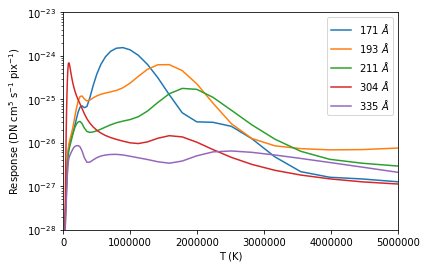

In [18]:
plt.figure()
plt.plot(temps, a171, label = '171 $\AA$')
plt.plot(temps, a193, label = '193 $\AA$')
plt.plot(temps, a211, label = '211 $\AA$')
plt.plot(temps, a304, label = '304 $\AA$')
plt.plot(temps, a335, label = '335 $\AA$')
plt.yscale('log')
plt.ylim((1.0e-28, 1.0e-23))
plt.xlim(0, 5e6)
plt.legend() 
plt.xlabel('T (K)')
plt.ylabel('Response (DN cm$^5$ s$^{-1}$ pix$^{-1}$)')
plt.show()

** Load in the observation data ** 

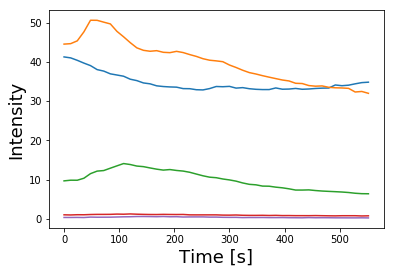

In [23]:
data = np.loadtxt('/data/khnum/REU2018/jwaczak/data/obs_data.txt', delimiter=',')
Dt = np.abs(data[0,1:]-data[0,:-1]).mean()
times = np.arange(0, len(data[0,:])*Dt, Dt)

fig, ax = plt.subplots()
ax.plot(times, data[1,:], label = '$171$ $\AA$')
ax.plot(times, data[2,:], label = '$193$ $\AA$')
ax.plot(times, data[3,:], label = '$211$ $\AA$')
ax.plot(times, data[4,:], label = '$304$ $\AA$')
ax.plot(times, data[5,:], label = '$335$ $\AA$')
ax.set_ylabel('Intensity', fontsize=18)
ax.set_xlabel('Time [s]', fontsize=18)
#ax.legend()
plt.show()